# Лабораторна №1

## Завдання 

Реалізувати тип "множина" 

Реалізувати базові операції:<br>
- Insert [+]
- Delete [+]
- Search [+]
- Clear [+]


Реалізувати додаткові операції:<br>
- Union [+]
- Intersection [+]
- SetDifference [+]
- SymDifference [+]
- isSubset [+]


Провести експериментальні заміри часу операцій 
- Search
- Union

## Код

In [2]:
class BitVectorSet:
    def __init__(self, t):
        """Ініціалізує множину з t 64-бітних регістрів (універсум з 64t елементів)."""
        self.t = t 
        self.vector = [0] * t

    def _get_index(self, element):
        """Повертає індекс регістра та позицію біта в цьому регстрі"""
        register_index = element >> 6 # Індекс 64-бітного регістра math.log2(64)
        bit_position = element & (64-1) # Позиція біта в регістрі
        return register_index, bit_position
    
    def have(self, element):
        """Перевіряє чи існує елемент в множині"""
        reg_index, b_position = self._get_index(element)
        return self.vector[reg_index] & (1 << b_position) != 0
        
    def add(self, element):
        """Додає елемент в множину"""
        reg_index, b_position = self._get_index(element)
        self.vector[reg_index] |= 1 << b_position

    def delete(self, element):
        """Видаляє елемент з множини"""
        reg_index, b_position = self._get_index(element)
        self.vector[reg_index] &= ~(1 << b_position)

    def union(self, other):
        """Повертає обєднання двух множин"""
        if self.t != other.t:
            raise ValueError("Множини мають різні розміри")
        result = BitVectorSet(self.t)
        result.vector = [self.vector[i] | other.vector[i] for i in range(self.t)]
        return result
    
    def intersection(self, other):
        """Повертає перетин двух множин"""
        if self.t != other.t:
            raise ValueError("Множини мають різні розміри")
        result = BitVectorSet(self.t)
        result.vector = [self.vector[i] & other.vector[i] for i in range(self.t)]
        return result
    
    def diff(self, other):
        """Повертає різницю двух множин"""
        result = BitVectorSet(self.t)
        result.vector = [self.vector[i] & ~other.vector[i] for i in range(self.t)]
        return result
    
    def sym_diff(self, other):
        """Повертає симетричну різницю: елементи, які є в одному з множин, але не в обох."""
        if self.t != other.t:
            raise ValueError("Множини мають різні розміри")
        result = BitVectorSet(self.t)
        result.vector = [self.vector[i] ^ other.vector[i] for i in range(self.t)]
        return result
    
    def issubset(self, other):
        """Перевіряє, чи є поточна множина підмножиною іншої."""
        if self.t != other.t:
            raise ValueError("Множини мають різні розміри")
        # Для кожного регістра перевіряємо, чи всі встановлені біти self є в other
        for i in range(self.t):
            if self.vector[i] & ~other.vector[i] != 0: 
                return False
        return True
    
    def clear(self):
        """Очищає множину, встановлюючи всі біти в 0."""
        self.vector = [0] * self.t
    
    def __str__(self):
        """Повертає бітовий вектор як рядок для зручного перегляду."""
        return ''.join(f'{reg:064b}' for reg in reversed(self.vector))


## Приклад роботи

In [3]:
A = BitVectorSet(2)
B = BitVectorSet(2)

In [4]:
print(A)
print(B)

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [5]:
A.add(127)
B.add(127)
A.add(0)
B.add(1)
A.add(3)
B.add(4)

In [6]:
print(A)
print(B)

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001001
10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010010


In [7]:
A.have(127), B.have(0)

(True, False)

In [8]:
A.delete(3)
B.delete(4)

In [9]:
print(A)
print(B)

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001
10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010


In [10]:
print(A.union(B))

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011


In [11]:
print(A.intersection(B))

10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [12]:
print(A.diff(B))

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001


In [13]:
print(A.sym_diff(B))

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011


In [14]:
print(A.issubset(B))

False


In [15]:
A.clear()

In [16]:
print(A)

00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


## Заміри часу

In [17]:
import random
import time
import matplotlib.pyplot as plt

In [18]:
def genranset(t: int, shouldexist = "dont_need", shouldnotexist = "dont_need"):
    """Генерує випадкову множину.

    t: розмір множини
    shouldexist: елемент який точно повинен існувати
    shouldntexist: елемент який точно не повинен існувати
    """
    S = BitVectorSet(t)

    for i in range(64 * t):  # Ітерація по всіх елементах універсуму
        if random.choice([True, False]):  # Випадково вирішуємо, чи додавати елемент
            S.add(i)

    if type(shouldexist) == int and 0 <= shouldexist < 64 * t: 
        S.add(shouldexist) # Додаємо елемент який повинен існувати

    if type(shouldnotexist) == int and 0 <= shouldnotexist < 64 * t:
        S.delete(shouldnotexist) # Додаємо елемент який не повинен існувати
        
    return S

In [19]:
def timeSearchElementExist(t):
    """Рахує час для перевірки існування елементу, який точно існує.
    
    t: розмір множини
    """
    element = random.randint(0, 64 * t - 1)  # Генеруємо піддослідного кролика
    ranset = genranset(t, shouldexist=element)  # Генеруємо множину з піддослідним кроликом
    
    start_time = time.time()  # Початок часу
    ranset.have(element)  # Перевіряємо, чи існує елемент в множині
    end_time = time.time()  # Кінець часу
    
    elapsed_time = end_time - start_time  # Різниця в часі (в секундах)
    return elapsed_time


In [20]:
def timeSearchElementNotExist(t):
    """Рахує час для перевірки існування елементу, який точно не існує.
    
    t: розмір множини
    """
    element = random.randint(0, 64 * t - 1)  # Генеруємо піддослідного кролика
    ranset = genranset(t, shouldnotexist=element)  # Генеруємо множину без піддослідного кролика
    
    start_time = time.time()  # Початок часу
    ranset.have(element)  # Перевіряємо, чи існує елемент в множині
    end_time = time.time()  # Кінець часу
    
    elapsed_time = end_time - start_time  # Різниця в часі (в секундах)
    return elapsed_time

In [21]:
def timeUnion(t):
    """Рахує час для обєднання двух множин.
    
    t: розмір множин
    """
    ranset1 = genranset(t)
    ranset2 = genranset(t)

    start_time = time.time()  # Початок часу
    ranset1.union(ranset2)  # Обєднуємо множини
    end_time = time.time()  # Кінець часу

    elapsed_time = end_time - start_time  # Різниця в часі (в секундах)
    return elapsed_time

In [22]:
def timeControl(t, n, type):
    """Функція для контролю часу виконання операцій з множиною.
    
    t: розмір множини
    n: кількість повторів
    type: тип операції ('searchexist', 'searchnotexist', 'union')
    """
    # Перевірка типу операції
    if type not in ['searchexist', 'searchnotexist', 'union']:
        raise ValueError("Тип повинен бути 'searchexist', 'searchnotexist' або 'union'")
    
    sum_time = 0 
    match type:
        case 'searchexist':
            for i in range(n):
                i_time = timeSearchElementExist(t)
                sum_time += i_time
        case 'searchnotexist':
            for i in range(n):
                i_time = timeSearchElementNotExist(t)
                sum_time += i_time
        case 'union':
            for i in range(n):
                i_time = timeUnion(t)
                sum_time += i_time
    avg_time = sum_time/n
    return avg_time


In [24]:
timeControl(1000, 1000, 'searchexist')

KeyboardInterrupt: 

In [124]:
timeControl(1000, 1000, 'searchnotexist')

4.547357559204102e-06

In [105]:
timeControl(1000, 1000, 'union')

0.00013441014289855956

In [3]:
165>>6

2

In [25]:
def plot_performance():
    # Налаштування параметрів
    # sizes = [1, 2, 4, 8, 16, 32, 64]  # Розміри множин для тестування
    sizes = range(1000,10000,500)
    search_exist_times = []
    search_not_exist_times = []
    #union_times = []

    # Вимірюємо час для кожного розміру множини
    for size in sizes:
        print(f"Testing size: {size}")
        search_exist_time = timeControl(size, 100, 'searchexist')
        search_not_exist_time = timeControl(size, 100, 'searchnotexist')
        #union_time = timeControl(size, 1000, 'union')

        search_exist_times.append(search_exist_time)
        search_not_exist_times.append(search_not_exist_time)
        #union_times.append(union_time)

    # Створення графіків
    plt.figure(figsize=(12, 6))

    plt.plot(sizes, search_exist_times, marker='o', label='Search Existing Element')
    plt.plot(sizes, search_not_exist_times, marker='o', label='Search Non-Existing Element')
    #plt.plot(sizes, union_times, marker='o', label='Union Operation')

    plt.xlabel('Size of the Set (t)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Performance Comparison of Set Operations')
    plt.legend()
    plt.grid(True)
    plt.show()


Testing size: 1000
Testing size: 1025
Testing size: 1050
Testing size: 1075
Testing size: 1100
Testing size: 1125
Testing size: 1150
Testing size: 1175
Testing size: 1200
Testing size: 1225
Testing size: 1250
Testing size: 1275
Testing size: 1300
Testing size: 1325
Testing size: 1350
Testing size: 1375
Testing size: 1400
Testing size: 1425
Testing size: 1450
Testing size: 1475
Testing size: 1500
Testing size: 1525
Testing size: 1550
Testing size: 1575
Testing size: 1600
Testing size: 1625
Testing size: 1650
Testing size: 1675
Testing size: 1700
Testing size: 1725
Testing size: 1750
Testing size: 1775
Testing size: 1800
Testing size: 1825
Testing size: 1850
Testing size: 1875
Testing size: 1900
Testing size: 1925
Testing size: 1950
Testing size: 1975
Testing size: 2000
Testing size: 2025
Testing size: 2050
Testing size: 2075
Testing size: 2100
Testing size: 2125
Testing size: 2150
Testing size: 2175
Testing size: 2200
Testing size: 2225
Testing size: 2250
Testing size: 2275
Testing size

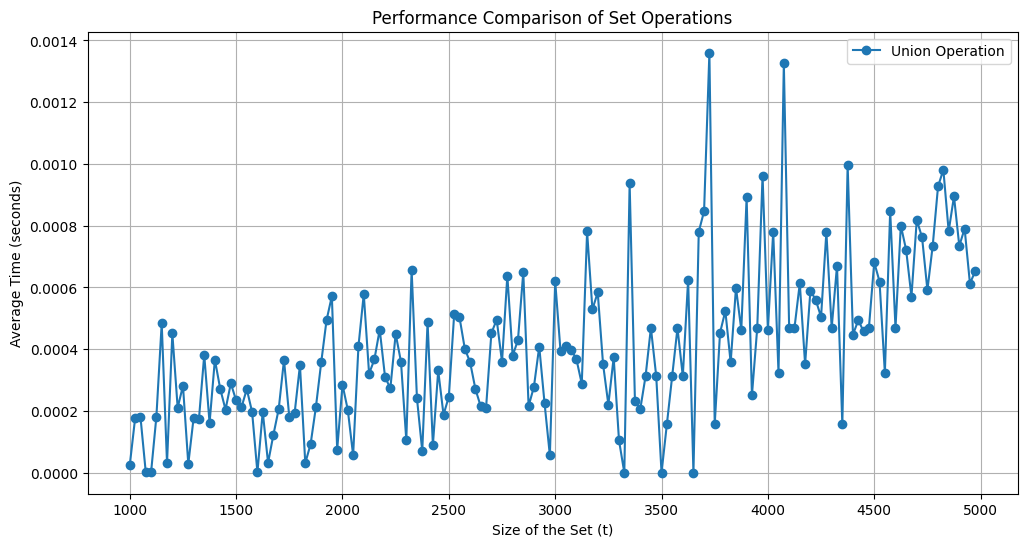

In [30]:
plot_performance()

Testing size: 1000
Testing size: 1500
Testing size: 2000
Testing size: 2500
Testing size: 3000
Testing size: 3500
Testing size: 4000
Testing size: 4500


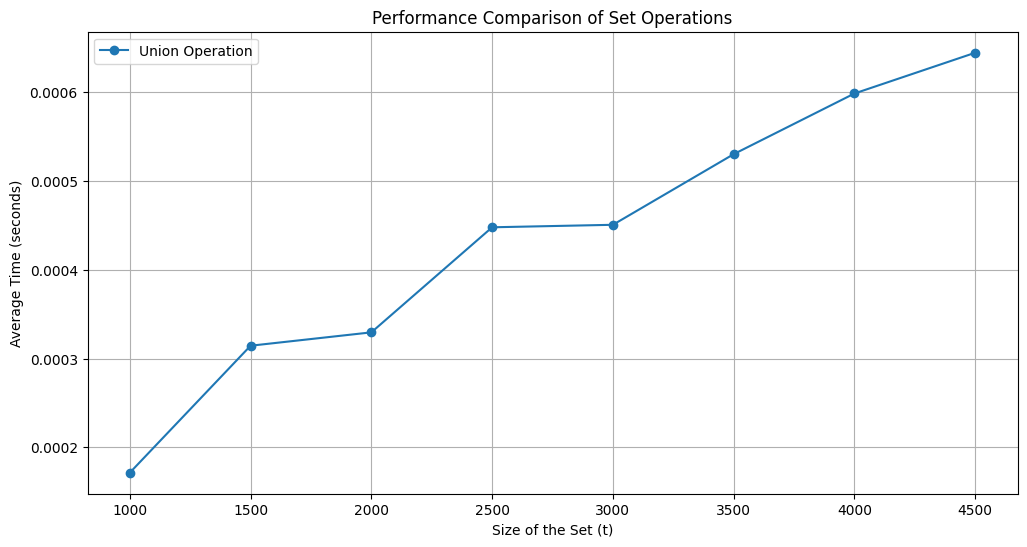

In [32]:
plot_performance()

Testing size: 1000
Testing size: 1500
Testing size: 2000
Testing size: 2500
Testing size: 3000
Testing size: 3500
Testing size: 4000
Testing size: 4500


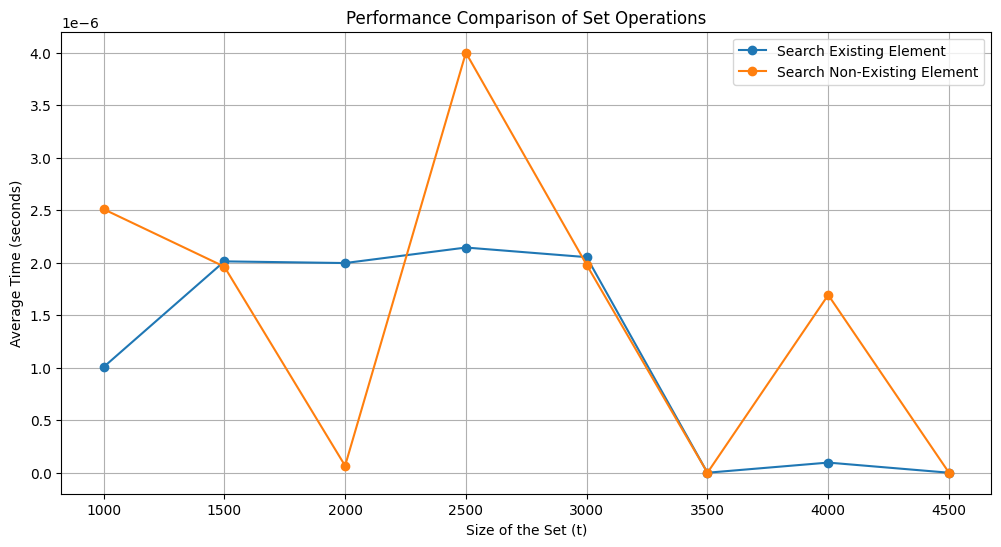

In [24]:
plot_performance()

Testing size: 1000
Testing size: 1500
Testing size: 2000
Testing size: 2500
Testing size: 3000
Testing size: 3500
Testing size: 4000
Testing size: 4500
Testing size: 5000
Testing size: 5500
Testing size: 6000
Testing size: 6500
Testing size: 7000
Testing size: 7500
Testing size: 8000
Testing size: 8500
Testing size: 9000
Testing size: 9500


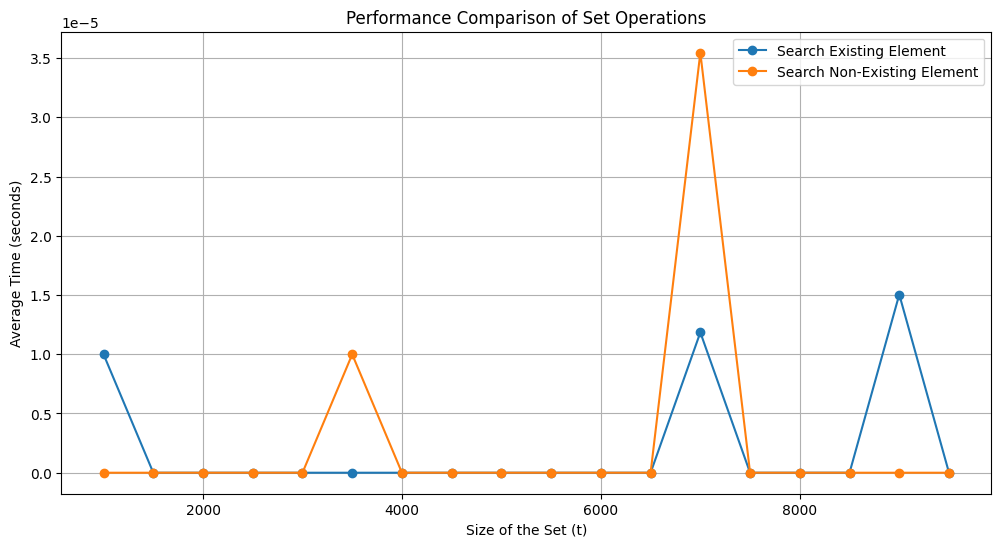

In [26]:
plot_performance()

In [1]:
x = 3

In [3]:
x&1

1

In [4]:
bin(22)

'0b10110'